ALINA EDIGAREVA

Prediction of surviavals with Gradient Boosting

 Gradient Boosting:
 
With the right adjustments, gradient boosting may be quite successful in extracting insights and optimizing accuracy from the small dataset (889 items). Gradient Boosting is perfect for survival prediction because it can reveal minute patterns and interactions between variables like Pclass, Fare, and Embarked. Gradient Boosting could be a very good option for your predictive modeling work if you consider these considerations.


•	Pros: Gardiant Boosting's advantages include strong predictive performance, interpretability (which may reveal which features are driving predictions via feature importance), and handling non-linear interactions (which capture complicated relationships in the data better than linear models).


•	Cons: The primary drawbacks of gradient boosting are its sensitivity to hyperparameters, shorter training time, preprocessing requirements (such as the need to encode categorical characteristics like sex and embarked using one-hot encoding), and overfitting risk. 



In [2]:
# Import some labraries and models from sklearn, this need for prediction
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import pickle

In [3]:
# Import data and checking data
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Information about Titanic dataset:

PassengerId: Passenger ID.

Survived: Weather Survived or not: 0 = No, 1 = Yes.

Pclass: Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd.

Name: Name of the passenger.

Sex: Gender.

Age: Age of the passenger.

SibSp: Number of siblings / spouses aboard the Titanic.

Parch: Number of parents / children aboard the Titanic.

Ticket: Ticket number.

Fare: Passenger fare.

Cabin: Cabin number.

Embarked: Port of Embarkation:C = Cherbourg, Q = Queenstown, S = Southampton.

In [4]:
# Checking format of the data and missiing values, we need to perform some data cleeaning and pre-processing before building a prediction model.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Dropping unsignificant columns
data = data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
#Fill missing values in the numerical columns with the median value.
median = data.Age.median()
data["Age"] = data["Age"].fillna(median)

In [8]:
# Drop rows where the "Embarked" column is missing.
data= data.dropna(subset="Embarked")


In [9]:
# Now data is a ready to start work with it
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
# Some garph insighst before making prediction model.

C:\Users\alina\AppData\Local\Temp\ipykernel_18204\4059751526.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




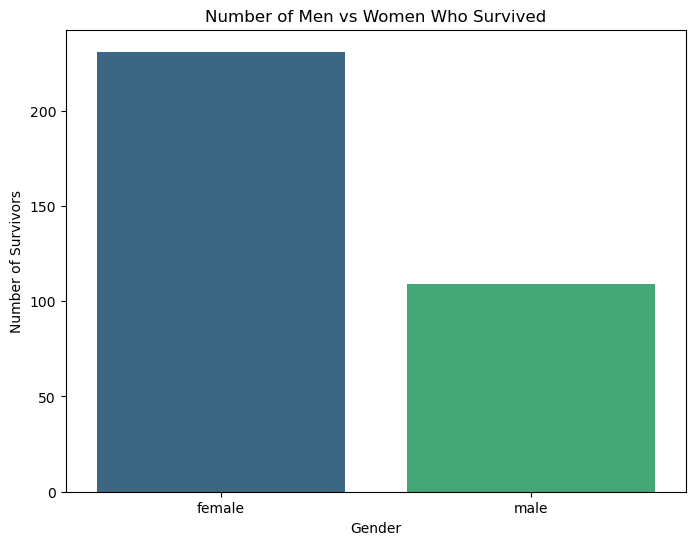

In [ ]:
# Plot to show how many men vs women survived
plt.figure(figsize=(8, 6))
survival_gender = data[data['Survived'] == 1].groupby('Sex')['Survived'].count()
sns.barplot(x=survival_gender.index, y=survival_gender.values, palette="viridis")
plt.title("Number of Men vs Women Who Survived")
plt.xlabel("Gender")
plt.ylabel("Number of Survivors")
plt.show()
# This graph shows that if you are female you have more chances to survive

C:\Users\alina\AppData\Local\Temp\ipykernel_18204\3635748836.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




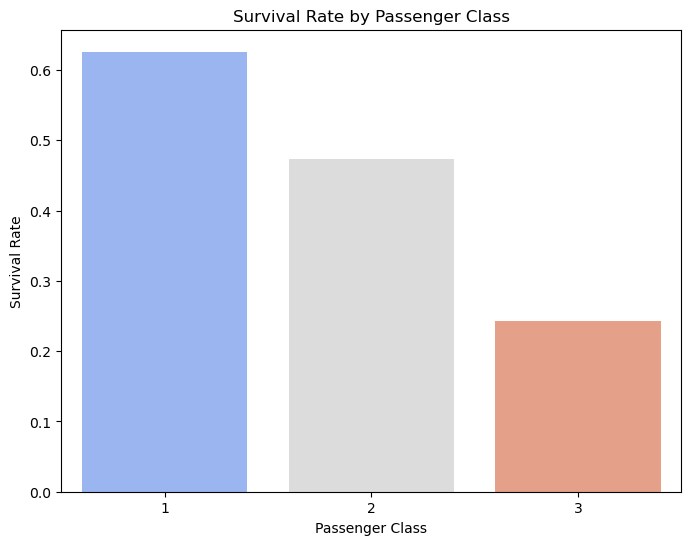

In [ ]:
# Survival rate by Passanger class
plt.figure(figsize=(8, 6))
survival_rate_by_class = data.groupby('Pclass')['Survived'].mean()
sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values, palette="coolwarm")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


C:\Users\alina\AppData\Local\Temp\ipykernel_18204\3232776450.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




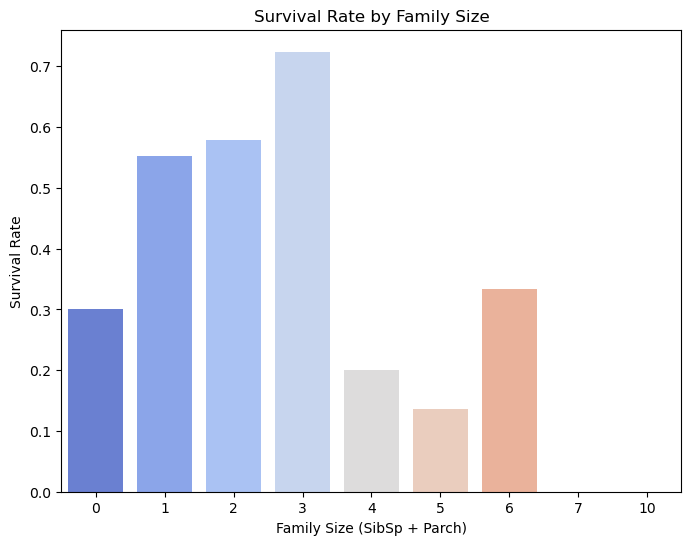

In [ ]:
plt.figure(figsize=(8, 6))
data['FamilySize'] = data['SibSp'] + data['Parch']
survival_rate_by_family = data.groupby('FamilySize')['Survived'].mean()
sns.barplot(x=survival_rate_by_family.index, y=survival_rate_by_family.values, palette="coolwarm")
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size (SibSp + Parch)")
plt.ylabel("Survival Rate")
plt.show()
# High survival rate in term of having 3 simbling, potentialy can be explained that it's a perfect amount to have a good groupwork to survive or womens and kids were the first to enter the boats.

In [ ]:
# Correlation Matrix, to check correlation between variables
import numpy as np
import plotly.figure_factory as ff

# Convert 'Sex' column to numerical representation before calculating correlation.
data['Sex_encoded'] = data['Sex'].map({'male': 0, 'female': 1})

# Now, calculate the correlation matrix, excluding the original 'Sex' column.
df_corr = data.select_dtypes(include=np.number).corr()

xx = list(df_corr.columns)
yy = list(df_corr.index)
zz = np.array(df_corr)

fig = ff.create_annotated_heatmap(
    zz,
    x=xx,
    y=yy,
    annotation_text=np.around(zz, decimals=2),
    hoverinfo='z',
    colorscale='RdBu'
)

fig.update_layout(
    height=1000
)

In [13]:
# Pie-chart
# From pie-chart we can see that only 38.2% of passengers survived
px.pie(data, names="Survived", template="none", title="A-priori probability of survival" )

In [14]:
# Our goal to build  model to show if the person can survive or not.
# Our target variable is "Survived", which will be our y-axis, and rest of variables x-axis.
# Apply train test split
X = data.drop(columns=["Survived"])
y = data.Survived
# Now we are dividing our data for training and testing, with test size(0.3), meaning that 70% of our data is used for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# To build our model we need to perfom one hot enconding for categotical data for train and test.
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') ## Set sparse=False to get a dense array, we need it to streamlit works

X_train_cat = X_train[["Sex", "Embarked"]]  #in our case categorical data is "Sex" and "Embarked".
X_train_cat_ohe = ohe.fit_transform(X_train_cat) # We are fitting and transform data
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe, columns=ohe.get_feature_names_out(), index=X_train.index) # and we are creating DataFrame from transformed data

# Now we need to do the same for for testing data
X_test_cat = X_test[["Sex", "Embarked"]]
X_test_cat_ohe = ohe.transform(X_test_cat)  # Use the same OneHotEncoder
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, columns=ohe.get_feature_names_out(), index=X_test.index)

In [16]:
X_train_cat_ohe.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 486 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex_female  622 non-null    float64
 1   Sex_male    622 non-null    float64
 2   Embarked_C  622 non-null    float64
 3   Embarked_Q  622 non-null    float64
 4   Embarked_S  622 non-null    float64
dtypes: float64(5)
memory usage: 29.2 KB


In [17]:
X_test_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 281 to 430
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex_female  267 non-null    float64
 1   Sex_male    267 non-null    float64
 2   Embarked_C  267 non-null    float64
 3   Embarked_Q  267 non-null    float64
 4   Embarked_S  267 non-null    float64
dtypes: float64(5)
memory usage: 12.5 KB


In [18]:
# Making pickle file with OneHotEncoder, user in Streamlit can choose "Male" or "Female", not 1 and 0.
import pickle
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False,  handle_unknown='ignore')
ohe.fit(data[["Sex", "Embarked"]])  # Adjust based on my dataset

with open("onehot_encoder.pkl", "wb") as f:
    pickle.dump(ohe, f)



In [19]:
# Scale the nuameric features ("Age", "Fare") using Standard Scaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Initialize the StandardScaler, to standardizes features by removing the mean and scaling to unit variance
sc = StandardScaler()

# Select numeric features ("Age" and "Fare") from the training set
X_train_num = X_train[["Age", "Fare"]]
X_train_num_sc = sc.fit_transform(X_train_num) # 
# Fit the scaler on the training data and transform it to standardize the values
X_train_num_sc = pd.DataFrame(X_train_num_sc, columns=X_train_num.columns, index=X_train.index) # and we are creating DataFrame from transformed data

# Doing same for test data. After fitting the scaler on the training data, it is applied to the test data using .transform(). 
# This ensures that the scaling of the test data matches the scaling applied to the training data.
X_test_num = X_test[["Age", "Fare"]]
X_test_num_sc = sc.transform(X_test_num) 
X_test_num_sc = pd.DataFrame(X_test_num_sc, columns=X_test_num.columns, index=X_test.index)

In [20]:
X_train_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 486 to 103
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     622 non-null    float64
 1   Fare    622 non-null    float64
dtypes: float64(2)
memory usage: 14.6 KB


In [21]:
X_test_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 281 to 430
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     267 non-null    float64
 1   Fare    267 non-null    float64
dtypes: float64(2)
memory usage: 6.3 KB


In [22]:
# Craetig pickle file for scaling data, it's for a streamlit application, user can choose from a range 1-100, not 0 and 1
with open("scaler.pkl", "wb") as f:
    pickle.dump(sc, f)

In [23]:
# Now we are droping columns that represensts original data, and insert our scaled and enconded columns for train
X_train_full = X_train.drop(columns=["Sex", "Embarked", "Age", "Fare"])
X_train_full = pd.concat([X_train_full, X_train_cat_ohe, X_train_num_sc], axis=1)

# Now we are doing the same for testing data 
X_test_full = X_test.drop(columns=["Sex", "Embarked", "Age", "Fare"])
X_test_full = pd.concat([X_test_full, X_test_cat_ohe, X_test_num_sc], axis=1)

In [24]:
# impoprting models that will be used for predicting 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV 



Gradient Boosting Classifier:

A machine learning algorithm that builds an ensemble of weak learners (typically decision trees) in a sequential manner.
Each tree attempts to correct the errors made by the previous ones, resulting in a robust predictive model.


Hyperparameters in param_grid

"n_estimators": 
Specifies the number of decision trees (estimators) to build in the ensemble.
More trees often improve the model's performance but increase computational cost.
Values: [1, 5, 10, 20, 50]
These are candidate values for the number of trees to try during hyperparameter tuning.

"max_depth":
Defines the maximum depth of each individual decision tree.
Controls how complex each tree can become.
Values: [2, 3]

In [25]:
# Here we need to put parameters for model, grid search is a hyperparameter tunning.
# This function creates a grid of hyperparameters
param_grid = {"n_estimators":[1,5,10,20,50],'max_depth':[2, 3]}
# Here is our model
gb_model = GradientBoostingClassifier()
# Hyperparameter tunning always is done by cross-validation, in our case cross-validation = 5.
# Our model trained for each combination of prameters from param_grid 
grid = GridSearchCV(gb_model,param_grid, cv=5)


In [26]:
# Now we need to fit our model with dataset 
grid.fit(X_train_full,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3],
                         'n_estimators': [1, 5, 10, 20, 50]})

In [27]:
# Access the best model after grid search
best_model = grid.best_estimator_
print(best_model)

GradientBoostingClassifier(n_estimators=10)


In [28]:
# Now we are doing prediction with our best models parameters after grid search 
predictions = best_model.predict(X_test_full)


In [29]:
# Save model for streamlit application 
import pickle
with open ("alina_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

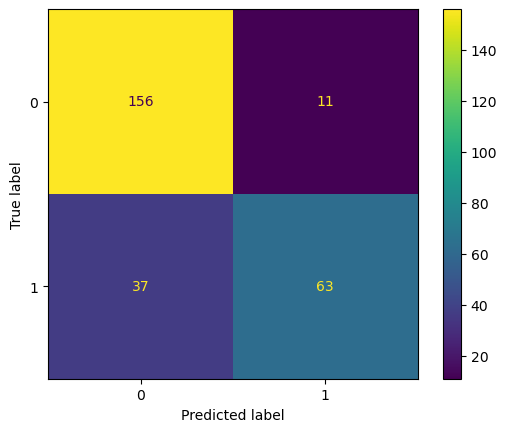

In [30]:
# Evaluating model using 
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, predictions)

Analyze of Confusion Matrix: 

True Negative (TN): 156
Passengers who did not survive and were correctly predicted as "Not Survived."

False Positive (FP): 11
Passengers who did not survive but were incorrectly predicted as "Survived."

False Negative (FN): 37
Passengers who survived but were incorrectly predicted as "Not Survived."

True Positive (TP): 63
Passengers who survived and were correctly predicted as "Survived."



As 61.8% of passengers in the dataset did not survive, this model is designed for Titanic enthusiasts to predict whether they would have survived or not. Therefore, one of the most important evaluation criteria is accuracy, with a focus on True Negatives (TN) and True Positives (TP) over False Positives (FP).

In [31]:
# Now we need to check if the model is overfitting 
from sklearn.metrics import accuracy_score

# Training-set predictions
train_predictions = grid.best_estimator_.predict(X_train_full)
train_accuracy = accuracy_score(y_train, train_predictions)

# Test- set predictions
test_accuracy = accuracy_score(y_test, predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.837620578778135
Test Accuracy: 0.8202247191011236


The model shows slight signs of overfitting because the training accuracy (83.76%) is slightly higher than the test accuracy (82.02%). Overfitting occurs when a model performs significantly better on the training data than on unseen test data, meaning it may have "learned" the training data too well, including noise and irrelevant patterns. Here are some possible reasons for this behavior:

Reasons for Overfitting:

Small Dataset Size:
The Titanic dataset has only 889 entries, which might not provide sufficient data to generalize well, especially for a complex model like Gradient Boosting.


Model Complexity:
Gradient Boosting is a powerful algorithm, but with parameters like n_estimators and max_depth, it can become overly complex. For example, a higher n_estimators or max_depth can lead to the model fitting noise in the training data. The model's complexity was managed through hyperparameter tuning, which helped mitigate overfitting to some extent. However, given the model's powerful nature and the small dataset size, overfitting was reduced but not entirely eliminated. Initially, the model achieved a training accuracy of 0.893 and a test accuracy of 0.817.

Class Imbalance:
The dataset is imbalanced, with 61.8% of passengers not surviving. Gradient Boosting might be focusing more on the majority class, affecting its performance on the minority class, which can exacerbate overfitting.
Temporal Correlation in Training Data:

If there are strong patterns in the sequence of passenger data, such as family groups or cabin arrangements, the model might learn these patterns specific to the training set.
Mitigation Strategies:

In [32]:

# Make predictions on the correct test set (X_test)
predictions = grid.predict(X_test_full)  # Changed from X_test_full to X_test

# Now calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, predictions))

Accuracy: 0.8202
Precision: 0.8514
Recall: 0.6300
F1 Score: 0.7241

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       167
           1       0.85      0.63      0.72       100

    accuracy                           0.82       267
   macro avg       0.83      0.78      0.80       267
weighted avg       0.82      0.82      0.81       267



Titanic survival prediction model demonstrates a solid performance. With an accuracy of 82.02%, the model accurately forecasts whether a case will survive or not in a significant proportion of cases. The accuracy of 85.14% shows a low false positive rate and a high likelihood of a passenger surviving as predicted by the algorithm. Although the model identifies 63% of the real survivors, as indicated by the recall of 63.00%, there is still opportunity for improvement in terms of recognizing all true positives. A solid overall balance between precision and recall is shown by the F1 Score, which is 72.41%. Although the model works well, especially in terms of precision, it could be even more effective at precisely identifying all survivors if recall score were improved. 

In [33]:
grid.best_estimator_.feature_importances_

array([0.14847132, 0.07751392, 0.        , 0.48389092, 0.09651987,
       0.        , 0.00306278, 0.        , 0.03031464, 0.06513451,
       0.09509204])

In [34]:
feat_import = grid.best_estimator_.feature_importances_

In [35]:

# Get the feature importances from the best estimator
feat_import = grid.best_estimator_.feature_importances_

# Get the feature names from the fitted model, not the original X
feature_names = grid.best_estimator_.feature_names_in_

# Create the DataFrame using the correct feature names and importances
imp_feats = pd.DataFrame(index=feature_names, data=feat_import, columns=['Importance'])

imp_feats

,Importance
Pclass,0.148471
SibSp,0.077514
Parch,0.000000
Sex_encoded,0.483891
Sex_female,0.096520
Sex_male,0.000000
Embarked_C,0.003063
Embarked_Q,0.000000
Embarked_S,0.030315
Age,0.065135


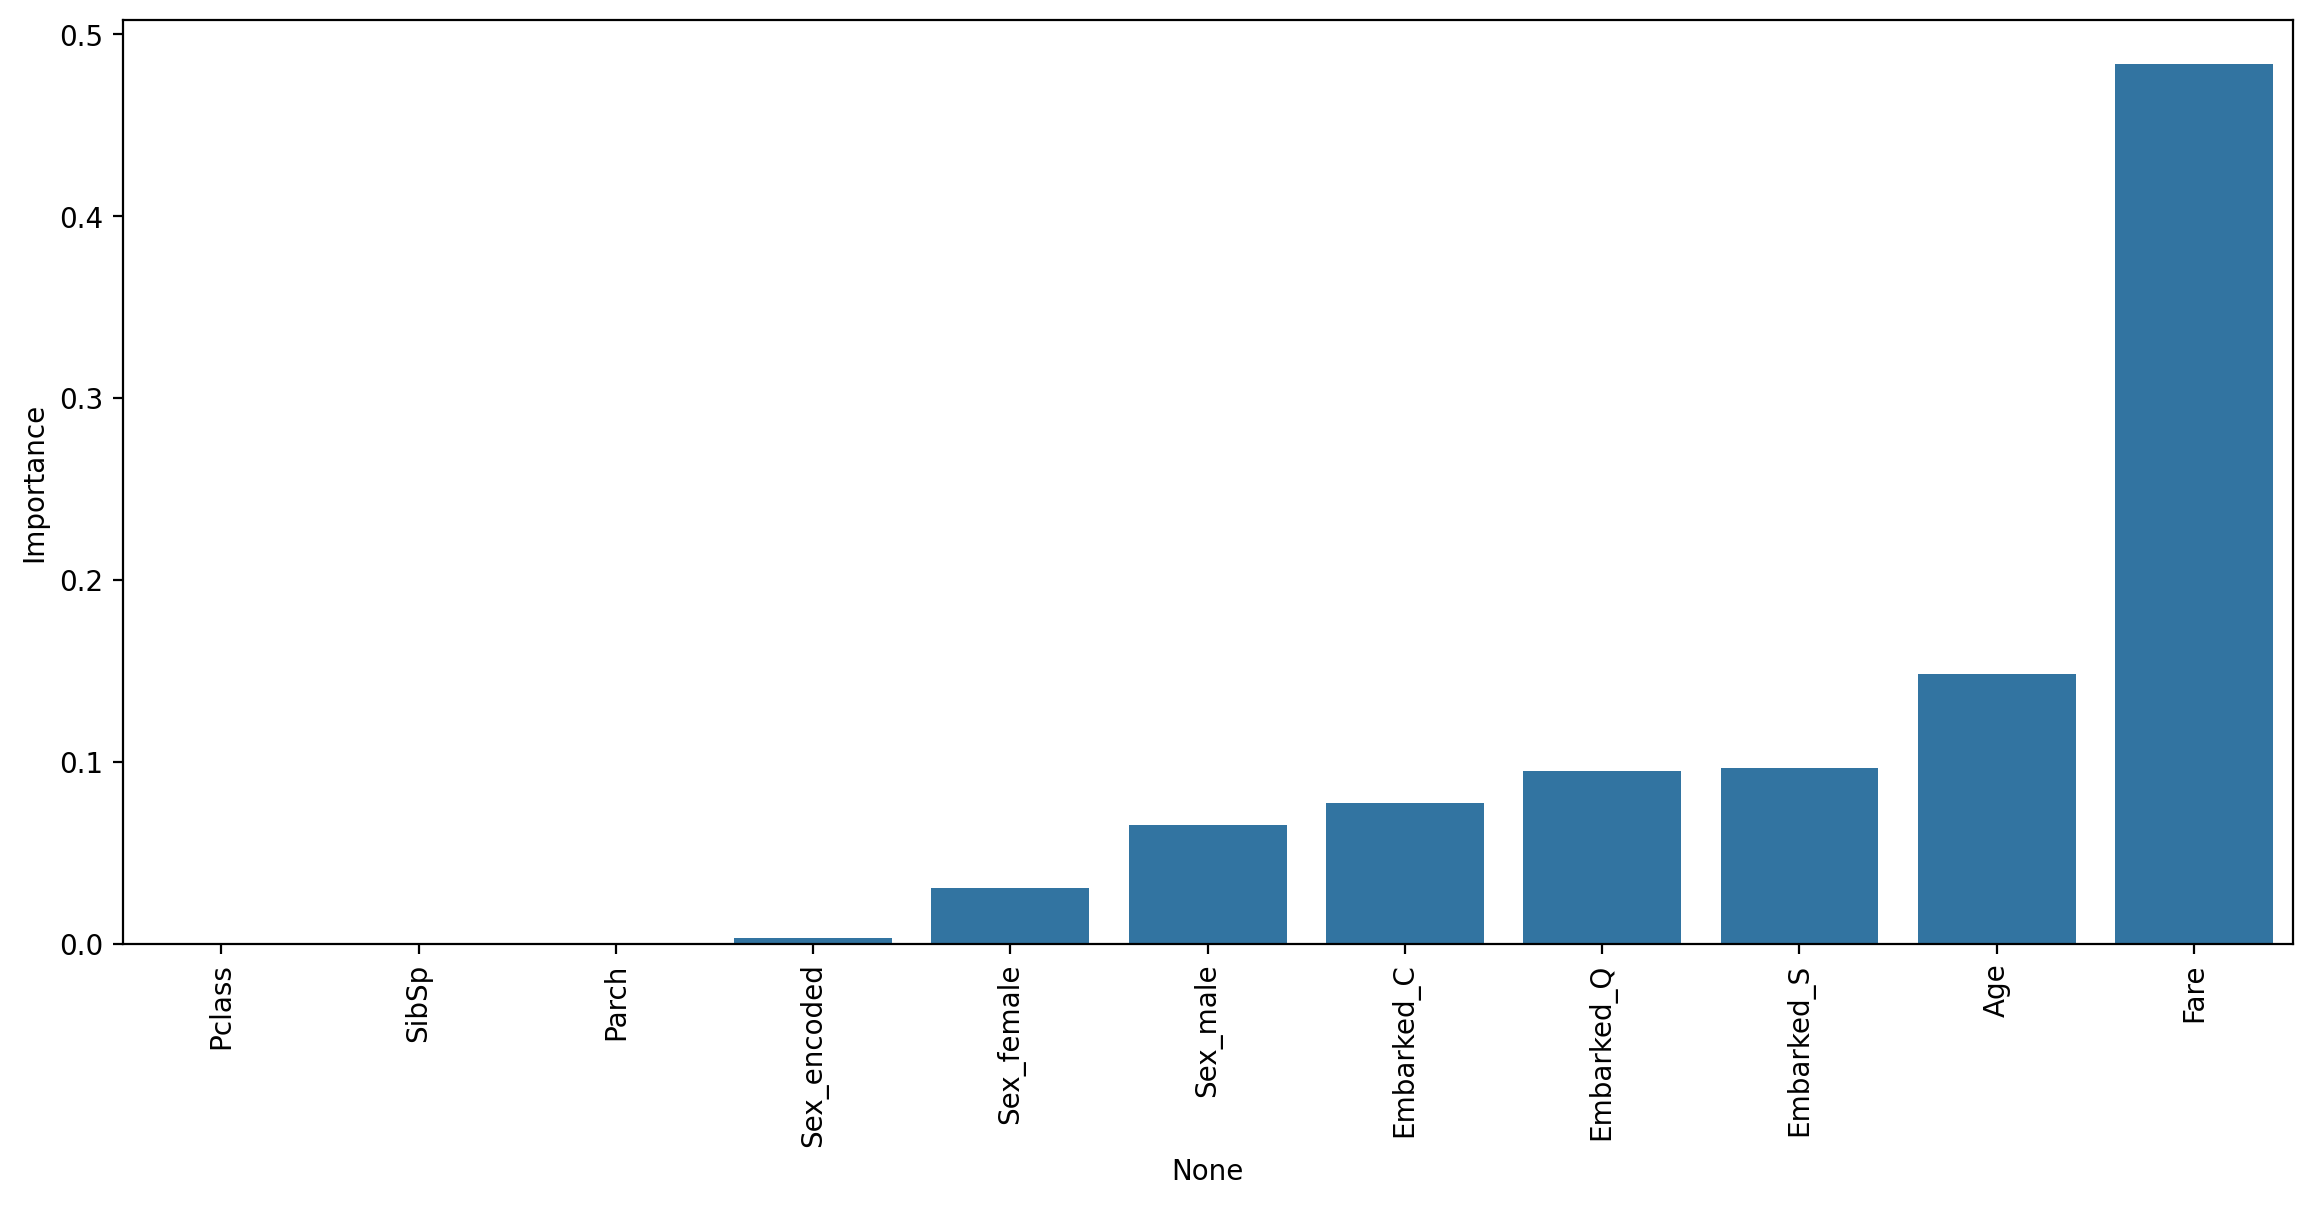

In [36]:
# Make a graph to repersents result for easier understanding 
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);